# Personal Data Analyzer: Netflix

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ViewingActivity.csv')

In [3]:
df.shape

(1810, 10)

In [4]:
df.head(2)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Akki4A,11/7/2020 16:01,0:00:59,Autoplayed: user action: None;,Friends: Season 6: The One with Mac and C.H.E....,NaN,Chrome PC (Cadmium),0:00:59,0:00:59,IN (India)
1,Akki4A,11/7/2020 15:35,0:18:18,NaN,Friends: Season 6: The One with Joey's Fridge ...,NaN,Chrome PC (Cadmium),0:21:39,0:21:39,IN (India)


In [5]:
df = df.drop(['Profile Name','Attributes','Supplemental Video Type','Device Type','Bookmark','Latest Bookmark','Country'], axis = 1)
df.head(2)

,Start Time,Duration,Title
0,11/7/2020 16:01,0:00:59,Friends: Season 6: The One with Mac and C.H.E....
1,11/7/2020 15:35,0:18:18,Friends: Season 6: The One with Joey's Fridge ...


In [6]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [7]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc = True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [8]:
# change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

# convert from UTC timezone to Asian/Kolkata time
df.index = df.index.tz_convert('Asia/Kolkata')

# reset the index so that Start Time becomes a column again
df = df.reset_index()

#double-check that it worked
df.head(1)

,Start Time,Duration,Title
0,2020-11-07 21:31:00+05:30,0:00:59,Friends: Season 6: The One with Mac and C.H.E....


In [9]:
df.dtypes

Start Time    datetime64[ns, Asia/Kolkata]
Duration                            object
Title                               object
dtype: object

In [10]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, Asia/Kolkata]
Duration                   timedelta64[ns]
Title                               object
dtype: object

In [11]:
df.head(1)

,Start Time,Duration,Title
0,2020-11-07 21:31:00+05:30,0 days 00:00:59,Friends: Season 6: The One with Mac and C.H.E....


In [12]:
# create a new dataframe called star that that takes from df
# only the rows in which the Title column contains 'Friends'
star = df[df['Title'].str.contains('Friends', regex=False)]

In [13]:
star.shape

(453, 3)

In [14]:
star = star[(star['Duration']> '0 days 00:01:00')]
star.shape

(385, 3)

# This is How Much Time i have spent watching Friends

In [15]:
star['Duration'].sum()

Timedelta('2 days 18:29:14')

In [16]:
star['weekday'] = star['Start Time'].dt.weekday
star['hour'] = star['Start Time'].dt.hour

# check to make sure the columns were added correctly
star.head(1)

,Start Time,Duration,Title,weekday,hour
1,2020-11-07 21:05:00+05:30,0 days 00:18:18,Friends: Season 6: The One with Joey's Fridge ...,5,21


# Graphical Representation:

In [17]:
%matplotlib inline

In [18]:
import matplotlib

<AxesSubplot:title={'center':'Friends Episodes Watched by Day by Akki4A'}>

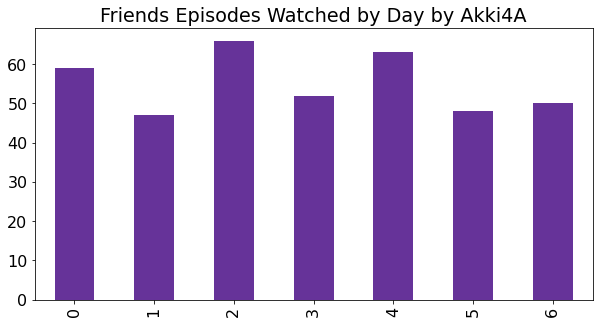

In [19]:
# set our categorical and define the order so the days are plotted Monday-Sunday
star['weekday'] = pd.Categorical(star['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

# create star_by_day and count the rows for each weekday, assigning the result to that variable
star_by_day = star['weekday'].value_counts()

# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
star_by_day = star_by_day.sort_index()

# optional: update the font size to make it a bit larger and easier to read
matplotlib.rcParams.update({'font.size': 16})


# plot star_by_day as a bar chart with the listed size and title
star_by_day.plot(kind='bar', figsize=(10,5), title='Friends Episodes Watched by Day by Akki4A', color=(0.4,0.2,0.6))



<AxesSubplot:title={'center':'Friends Episodes Watched by Hour by Akki4A'}>

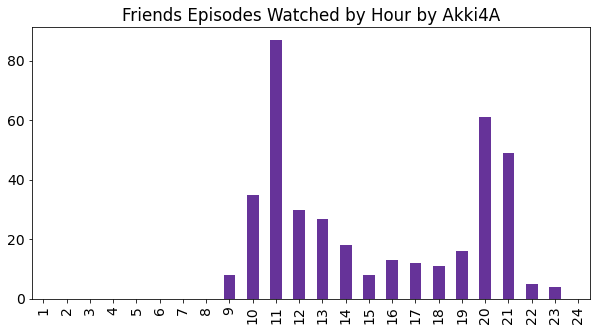

In [20]:
# set our categorical and define the order so the hours are plotted 1-24 hours
star['hour'] = pd.Categorical(star['hour'], categories=
    [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],
    ordered=True)

# create star_by_hour and count the rows for each hour, assigning the result to that variable
star_by_day = star['hour'].value_counts()

# sort the index using our categorical, so that 1 (0) is 1 hour, 2 (1) is 2 hour  so on...
star_by_day = star_by_day.sort_index()

matplotlib.rcParams.update({'font.size': 14})

star_by_day.plot(kind='bar', figsize=(10,5), title='Friends Episodes Watched by Hour by Akki4A', color=(0.4,0.2,0.6))